In [25]:
import matplotlib.pyplot as plt
from board import Board
from player import Player
from game import Game
from agents import ManualAgent, QLearnAgent, RandomAgent

In [61]:
def train_rl_agent(iters, player_symb):
    agent = QLearnAgent(player_symb)

    initial_eps = 1.0
    min_eps = 0.2
    eps_decay = 0.000005
    alpha = 0.3
    gamma = 0.9
    agent.train(iters=iters, initial_eps=initial_eps, min_eps=min_eps, eps_decay=eps_decay, alpha=alpha, gamma=gamma)

    return agent

In [ ]:
# Simulation counts
Ns = [100, 1000, 10000, 100000, 1000000]

# Initialize results dictionary for two game types for each N
results = {
    N: {
        "gametype1": {"winsO": 0, "winsX": 0, "draws": 0},
        "gametype2": {"winsO": 0, "winsX": 0, "draws": 0},
        "gametype3": {"winsO": 0, "winsX": 0, "draws": 0},
    }
    for N in Ns
}

randomX = RandomAgent()
randomO = RandomAgent()

for N in Ns:
    RLagentO = train_rl_agent(N, "O")
    RLagentX = train_rl_agent(N, "X")
    
    for _ in range(N):
        # Game Type 1: randomO vs randomX
        game = Game(randomO, randomX)
        game.play()
        status = game.board.check_terminal()
        if status == 0:
            results[N]["gametype1"]["draws"] += 1
        elif status == 1:
            results[N]["gametype1"]["winsO"] += 1
        elif status == -1:
            results[N]["gametype1"]["winsX"] += 1

        # Game Type 2: RLagentO vs randomX
        game = Game(RLagentO, randomX)
        game.play()
        status = game.board.check_terminal()
        if status == 0:
            results[N]["gametype2"]["draws"] += 1
        elif status == 1:
            results[N]["gametype2"]["winsO"] += 1
        elif status == -1:
            results[N]["gametype2"]["winsX"] += 1

        # Game Type 3: randomO vs RLagentX
        game = Game(randomO, RLagentX)
        game.play()
        status = game.board.check_terminal()
        if status == 0:
            results[N]["gametype3"]["draws"] += 1
        elif status == 1:
            results[N]["gametype3"]["winsO"] += 1
        elif status == -1:
            results[N]["gametype3"]["winsX"] += 1

    # Normalize counts by the number of games N for each simulation
    for game_type in results[N]:
        for stat in results[N][game_type]:
            results[N][game_type][stat] /= N

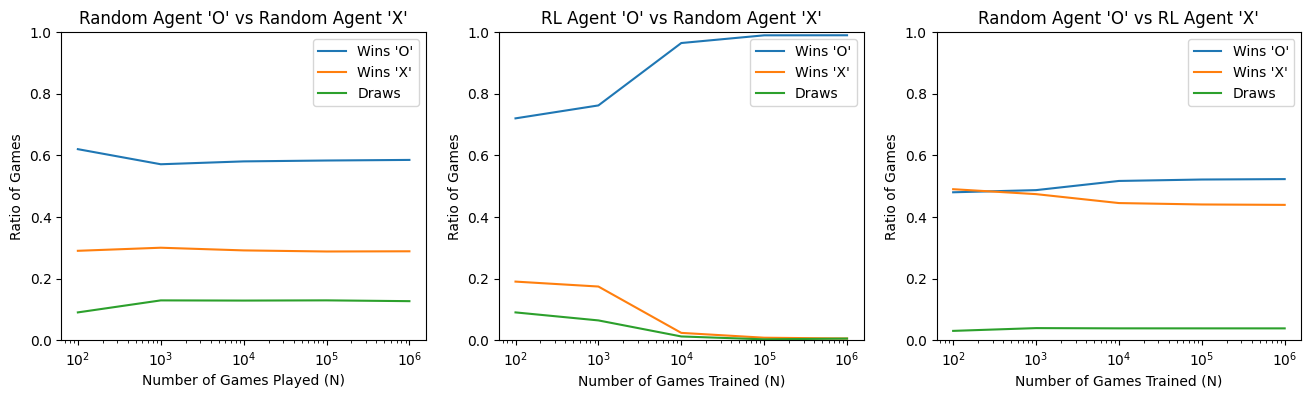

In [77]:
import matplotlib.pyplot as plt

# Assume "results" dictionary is already built as in previous code.
Ns_sorted = sorted(results.keys())

# Prepare data for each subplot
game1_winsO = [results[N]["gametype1"]["winsO"] for N in Ns_sorted]
game2_winsO = [results[N]["gametype2"]["winsO"] for N in Ns_sorted]
game3_winsO = [results[N]["gametype3"]["winsO"] for N in Ns_sorted]

game1_winsX = [results[N]["gametype1"]["winsX"] for N in Ns_sorted]
game2_winsX = [results[N]["gametype2"]["winsX"] for N in Ns_sorted]
game3_winsX = [results[N]["gametype3"]["winsX"] for N in Ns_sorted]

game1_draws = [results[N]["gametype1"]["draws"] for N in Ns_sorted]
game2_draws = [results[N]["gametype2"]["draws"] for N in Ns_sorted]
game3_draws = [results[N]["gametype3"]["draws"] for N in Ns_sorted]

# Create three subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Results for game type 1 subplot
axes[0].plot(Ns_sorted, game1_winsO, label="Wins 'O'")
axes[0].plot(Ns_sorted, game1_winsX, label="Wins 'X'")
axes[0].plot(Ns_sorted, game1_draws, label='Draws')
axes[0].set_xscale('log')
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Number of Games Played (N)')
axes[0].set_ylabel('Ratio of Games')
axes[0].set_title("Random Agent 'O' vs Random Agent 'X'")
axes[0].legend()

# Results for game type 2 subplot
axes[1].plot(Ns_sorted, game2_winsO, label="Wins 'O'")
axes[1].plot(Ns_sorted, game2_winsX, label="Wins 'X'")
axes[1].plot(Ns_sorted, game2_draws, label='Draws')
axes[1].set_xscale('log')
axes[1].set_ylim(0, 1)
axes[1].set_xlabel('Number of Games Trained (N)')
axes[1].set_ylabel('Ratio of Games')
axes[1].set_title("RL Agent 'O' vs Random Agent 'X'")
axes[1].legend()

# Results for game type 3 subplot
axes[2].plot(Ns_sorted, game3_winsO, label="Wins 'O'")
axes[2].plot(Ns_sorted, game3_winsX, label="Wins 'X'")
axes[2].plot(Ns_sorted, game3_draws, label='Draws')
axes[2].set_xscale('log')
axes[2].set_ylim(0, 1)
axes[2].set_xlabel('Number of Games Trained (N)')
axes[2].set_ylabel('Ratio of Games')
axes[2].set_title("Random Agent 'O' vs RL Agent 'X'")
axes[2].legend()

plt.show()